<a href="https://colab.research.google.com/github/Ram8036/Mini-Project/blob/main/Image%20Classification%20using%20Machine%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install ipython-autotime
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.84 s (started: 2021-06-28 16:49:04 +00:00)


In [4]:
#preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

datadir = '/content/drive/MyDrive/Machine Learning/images'
Categories = ['car','bike','tiger','flights','helicopter']   # car = 0 , bike = 1 , tiger = 2 , flights = 3 , helicopter - 4
for i in Categories:
  class_num = Categories.index(i)   # label encoding the images
  path = os.path.join(datadir,i)    # create path to use all the images
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    # print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(250,250,3))   # normalizes the value from 0 to 1
    flat_data.append(img_resized.flatten())   # flattening the data
    images.append(img_resized)
    target.append(class_num)
    

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)

time: 43.1 s (started: 2021-06-28 16:52:22 +00:00)


In [6]:
flat_data

array([[0.1396    , 0.2650902 , 0.31607059, ..., 0.26201409, 0.23612389,
        0.19378664],
       [0.23548355, 0.17847843, 0.06475056, ..., 0.46919235, 0.46919235,
        0.42213352],
       [0.466655  , 0.65095304, 0.95292951, ..., 0.61957245, 0.5803451 ,
        0.58718431],
       ...,
       [0.65096471, 0.67448216, 0.72155294, ..., 0.83596078, 0.64179235,
        0.43769449],
       [0.23529412, 0.5254902 , 0.78039216, ..., 0.96843765, 0.90572392,
        0.33745725],
       [0.69558431, 0.82107451, 0.91820392, ..., 0.47879529, 0.59510667,
        0.50624627]])

time: 4.27 ms (started: 2021-06-28 16:53:22 +00:00)


In [7]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4])

time: 5.38 ms (started: 2021-06-28 16:53:25 +00:00)


<BarContainer object of 5 artists>

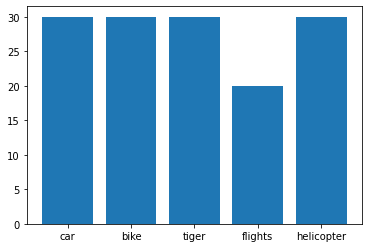

time: 170 ms (started: 2021-06-28 16:53:28 +00:00)


In [8]:
unique,count = np.unique(target,return_counts=True)
plt.bar(Categories,count)

In [9]:
# split data into training and testing
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.6,random_state=42)

time: 259 ms (started: 2021-06-28 16:53:31 +00:00)


In [10]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'kernel':['rbf']},
              {'C':[1,10,100,1000],'kernel':['poly']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['poly']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 5min 25s (started: 2021-06-28 16:53:35 +00:00)


In [11]:
y_pred = clf.predict(x_test)
y_pred

array([3, 1, 1, 4, 1, 1, 2, 2, 0, 3, 4, 4, 3, 0, 4, 1, 3, 0, 3, 4, 1, 4,
       0, 0, 4, 2, 4, 3, 3, 0, 0, 4, 3, 1, 1, 1, 3, 3, 2, 0, 1, 1, 1, 4,
       4, 4, 4, 2, 0, 4, 2, 1, 2, 3, 3, 3, 3, 2, 0, 2, 0, 0, 3, 2, 0, 2,
       2, 1, 4, 0, 0, 2, 1, 0, 0, 3, 2, 1, 2, 2, 3, 2, 0, 3])

time: 1.48 s (started: 2021-06-28 17:00:16 +00:00)


In [12]:
y_test

array([3, 2, 1, 4, 1, 0, 2, 2, 3, 3, 4, 1, 2, 0, 4, 2, 0, 0, 4, 4, 1, 4,
       2, 0, 4, 0, 4, 3, 0, 0, 0, 4, 3, 3, 1, 1, 2, 4, 2, 0, 1, 0, 1, 0,
       3, 4, 4, 2, 1, 0, 2, 1, 0, 3, 2, 3, 1, 1, 2, 2, 0, 1, 2, 0, 2, 2,
       2, 4, 1, 0, 2, 2, 1, 1, 1, 3, 0, 1, 2, 2, 4, 4, 0, 0])

time: 5.76 ms (started: 2021-06-28 17:00:22 +00:00)


In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

time: 3.81 ms (started: 2021-06-28 17:00:33 +00:00)


In [15]:
confusion_matrix(y_pred,y_test)

array([[ 9,  4,  4,  1,  0],
       [ 2, 10,  2,  1,  1],
       [ 4,  1, 11,  0,  1],
       [ 3,  1,  4,  7,  3],
       [ 2,  2,  0,  1, 10]])

time: 9.26 ms (started: 2021-06-28 17:00:37 +00:00)


In [16]:
accuracy_score(y_pred,y_test)

0.5595238095238095

time: 4.95 ms (started: 2021-06-28 17:00:40 +00:00)


In [17]:
import pickle   # saving the model using pickle library
pickle.dump(clf,open('img_model.p','wb'))

time: 94.6 ms (started: 2021-06-28 17:00:45 +00:00)


In [18]:
model = pickle.load(open('img_model.p','rb'))

time: 93 ms (started: 2021-06-28 17:00:50 +00:00)


enter your url : https://th.bing.com/th/id/OIP.cPqkJWszWkvrx7goDP73jgHaEK?w=324&h=182&c=7&o=5&dpr=1.38&pid=1.7
(251, 447, 3)
PREDICTED OUTPUT: car


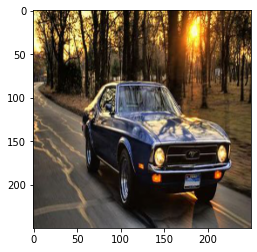

time: 5.54 s (started: 2021-06-28 17:01:51 +00:00)


In [20]:
# testing a brand new image
flat_data = []
url = input('enter your url : ')
img = imread(url)
img_resized = resize(img,(250,250,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = Categories[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')